In [1]:
# Importing the libraries
%matplotlib inline
from copy import deepcopy
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
plt.style.use('ggplot')

# Importing the dataset (concentric circles datasets)
dataset = pd.read_csv('dataset2.csv')
dataset.head()
X = dataset.iloc[:, 1].values
y = dataset.iloc[:, 2].values

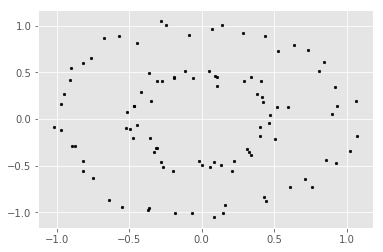

In [2]:
# plotting the dataset
data = np.array(list(zip(X, y)))
plt.scatter(X, y, c='black', s=7)
plt.show()

In [3]:
# defining the reasonable vraince value for rbf kernel
var = 0.26

# kernelized k-means using rbf kernel
def RbfKernel(data1, data2, sigma):
    squaredEuclidean = np.linalg.norm(data1 - data2)
    result = np.exp(-(squaredEuclidean)/(2*sigma**2))
    return result

# calculating the third term of the equation of part(iv)
def thirdTerm(memberCluster, Z1):
    zkj = 0
    zmj = 0

    term3 = [[0],[0]]
    for i in range(0, memberCluster.shape[0]):
        zkj = zkj + Z1[i][0]
        for j in range(0, memberCluster.shape[0]):
            term3[0][0] = term3[0][0] + RbfKernel(memberCluster[i, :], memberCluster[j, :], var)*Z1[i][0]*Z1[j][0]
            term3[1][0] = term3[1][0] + RbfKernel(memberCluster[i, :], memberCluster[j, :], var)*Z1[i][1]*Z1[j][1]
            
    term3[0][0] = term3[0][0] / (zkj ** 2)
    term3[1][0] = term3[1][0] / ((100-zkj) ** 2)
    
    return term3

# calculating the sencond term of the equation of part(iv)
def secondTerm(dataI, memberCluster, Z2):
    zkj = 0
    term2 = [[0],[0]]
    for i in range(0, memberCluster.shape[0]):
        zkj = zkj + Z2[i][0]
        term2[0][0] = term2[0][0] + RbfKernel(dataI, memberCluster[i, :], var)*Z2[i][0]
        term2[1][0] = term2[1][0] + RbfKernel(dataI, memberCluster[i, :], var)*Z2[i][1]
        
    term2[0][0] = 2 * term2[0][0] / zkj
    term2[1][0] = 2 * term2[1][0] / (100-zkj)

    return term2

In [62]:
# randomly initializing the Z value
Z_list = []
for i in range (len(data)):
    m = random.randint(0,1)
    Z_list.append([m ,1-m])
    
Z_pre=[]
for i in range (len(data)):
    m = random.randint(0,1)
    Z_pre.append([m ,1-m])
    
distances = [[0],[0]]

# comparing and updating the Z value, breaks when previous Z equals to the current one
while True:
    
    term3 = thirdTerm(data, Z_list)
    for i in range(len(data)):
        
        distances[0][0] = RbfKernel(data[i], data[i], var) - secondTerm(data[i], data, Z_list)[0][0] + term3[0][0]
        distances[1][0] = RbfKernel(data[i], data[i], var) - secondTerm(data[i], data, Z_list)[1][0] + term3[1][0]
            
        if distances[0][0] < distances[1][0]:
            Z_list[i][0] = 1
            Z_list[i][1] = 0
        else :
            Z_list[i][0] = 0
            Z_list[i][1] = 1
    
    if Z_pre==Z_list:
        break

    for i in range(len(Z_list)):
        Z_pre[i][0] = Z_list[i][0]
        Z_pre[i][1] = Z_list[i][1]

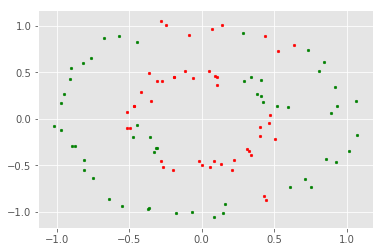

In [63]:
# setting the number of clusters
k=2
# plotting out the results
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([data[j] for j in range(len(data)) if Z_list[j][0] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
plt.show()